In [0]:
import pandas as pd

In [3]:
from google.colab import files
files.upload()

Saving wholesale_customers.csv to wholesale_customers.csv


{'wholesale_customers.csv': b'Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen\r\n2,3,12669,9656,7561,214,2674,1338\r\n2,3,7057,9810,9568,1762,3293,1776\r\n2,3,6353,8808,7684,2405,3516,7844\r\n1,3,13265,1196,4221,6404,507,1788\r\n2,3,22615,5410,7198,3915,1777,5185\r\n2,3,9413,8259,5126,666,1795,1451\r\n2,3,12126,3199,6975,480,3140,545\r\n2,3,7579,4956,9426,1669,3321,2566\r\n1,3,5963,3648,6192,425,1716,750\r\n2,3,6006,11093,18881,1159,7425,2098\r\n2,3,3366,5403,12974,4400,5977,1744\r\n2,3,13146,1124,4523,1420,549,497\r\n2,3,31714,12319,11757,287,3881,2931\r\n2,3,21217,6208,14982,3095,6707,602\r\n2,3,24653,9465,12091,294,5058,2168\r\n1,3,10253,1114,3821,397,964,412\r\n2,3,1020,8816,12121,134,4508,1080\r\n1,3,5876,6157,2933,839,370,4478\r\n2,3,18601,6327,10099,2205,2767,3181\r\n1,3,7780,2495,9464,669,2518,501\r\n2,3,17546,4519,4602,1066,2259,2124\r\n1,3,5567,871,2010,3383,375,569\r\n1,3,31276,1917,4469,9408,2381,4334\r\n2,3,26373,36423,22019,5154,4337,16523\r\n2,3,2264

In [20]:
data = pd.read_csv("wholesale_customers.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [21]:
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [22]:
# Display the data
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


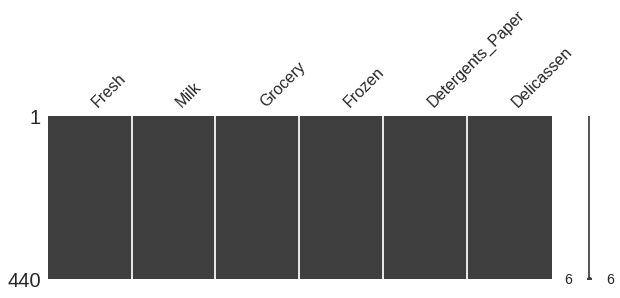

In [24]:
import missingno as msno
# Missing data detection
msno.matrix(data,figsize=(10,3))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


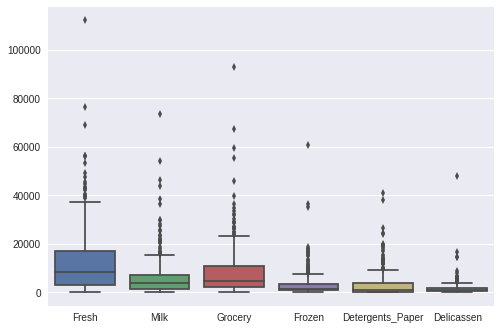

In [26]:
import seaborn as sn
# Data distribution
sn.boxplot(data=data, orient="v")

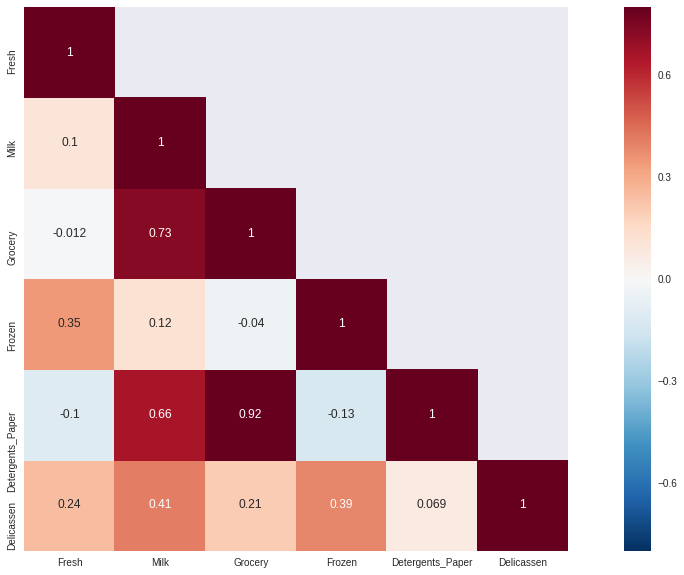

In [28]:
import numpy as np
import matplotlib.pyplot as plt
# Correlation analasys
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)


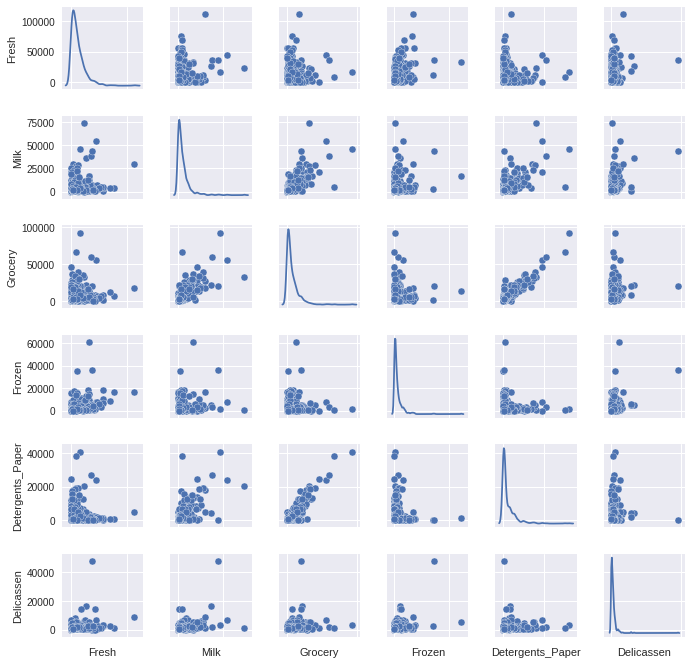

In [29]:
# Scatterplot
mx_plot = sn.pairplot(data, diag_kind="kde", size=1.6)
mx_plot.set(xticklabels=[])

In [0]:
X = data.drop(["Grocery"], axis = 1)

In [31]:
X.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,12669,9656,214,2674,1338
1,7057,9810,1762,3293,1776
2,6353,8808,2405,3516,7844
3,13265,1196,6404,507,1788
4,22615,5410,3915,1777,5185


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

In [14]:
# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


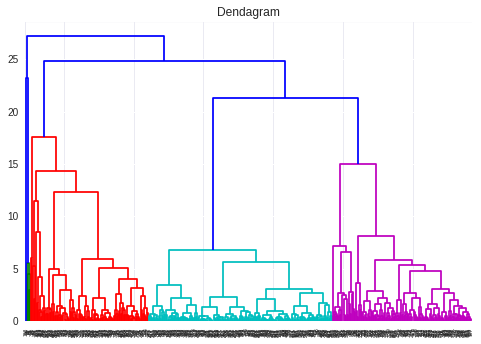

In [15]:
# Create dendragram
dendagram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendagram")
plt.show()

In [17]:
# Creating model
model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_out = model.fit_predict(X)
y_out

array([2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 4, 2, 6, 1, 1, 0, 2, 0, 1, 6, 2, 1, 2, 1, 4, 2, 2, 1, 6,
       2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 6, 1, 1, 1, 2, 2, 0, 1, 4, 4, 0,
       1, 0, 1, 0, 6, 5, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2,
       1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 6, 1, 1, 1, 0, 1, 1, 0, 2,
       1, 6, 2, 0, 2, 2, 2, 1, 1, 6, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 0, 1, 2, 0, 0, 2, 3, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2,
       1, 1, 2, 6, 0, 1, 1, 2, 1, 2, 2, 6, 1, 6, 1, 2, 2, 2, 6, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 1, 6, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0,

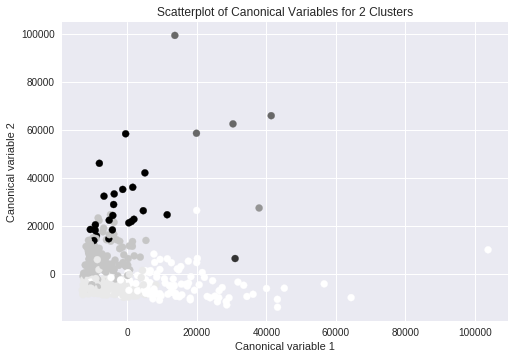

In [18]:
pca_2 = PCA(2) # Two Canonical Variables
plot_columns = pca_2.fit_transform(data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()